# Telco Customer Churn Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## BONUS:EDA USING PROFILE REPORT

In [3]:
from pandas_profiling import ProfileReport

In [4]:
profile = ProfileReport(df, title="Telco data",explorative=True)

In [5]:
profile.to_file("Telco_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.profile_report(title="Telco data", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## BONUS 2: PREPROCESSING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Although we don't have the task to clean the dataset,
incase you need to do so,
one thing you would deal with is the TotalCharges column. It has been given the object datatype.

In [10]:
#since there will be errors there is this efficient way to deal with them
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
df.TotalCharges.dtypes

dtype('float64')

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Demographic:

        a.	Which 2 demographics proved to be the most popular with the telco brand?
        b.	If the marketing team wanted to increase customer retention, to whom should they focus their advertisements on?


In [13]:
churn_no = df[df['Churn'] == 'No']
churn_yes = df[df['Churn'] == 'Yes']

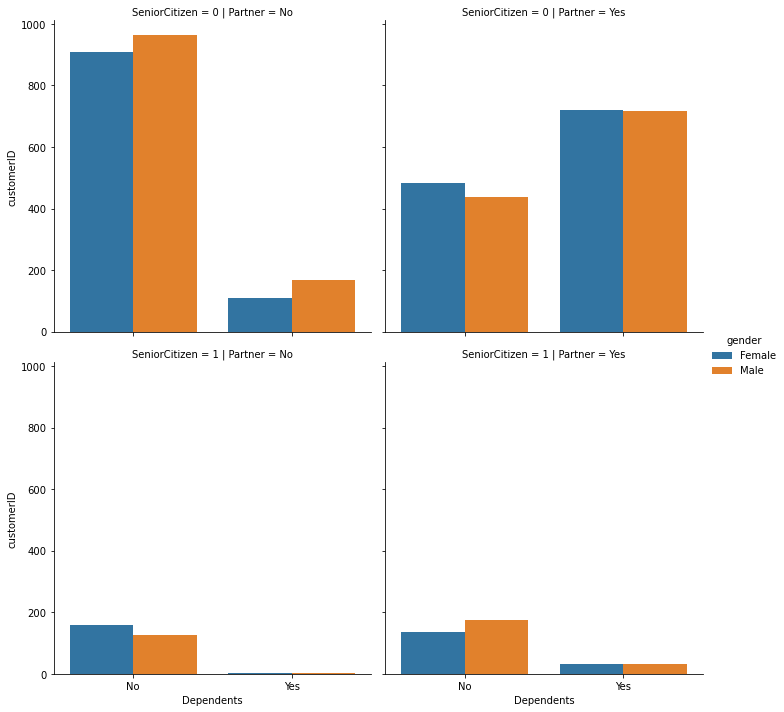

In [35]:
demo_no = churn_no.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['customerID'].count().reset_index()
sns.catplot(data = demo_no, x = 'Dependents', y = 'customerID', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

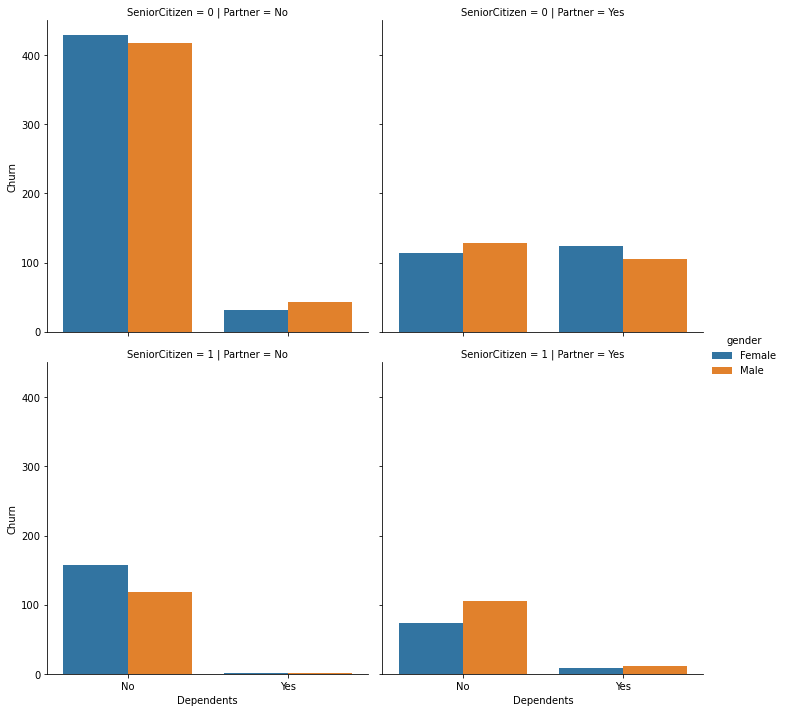

In [36]:
demo_yes = churn_yes.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['Churn'].count().reset_index()
sns.catplot(data = demo_yes, x = 'Dependents', y = 'Churn', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

Both single, young to mid aged, men and women without dependent are the most popular with the telco brand. Yet, they are the majority of those churning. Therefore, the telco brand should target these two demographics in their marketing adverts.

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Services:
a. Which 3 services are contributing to a higher monthly charge and resulting to
customers churning? (Use visualizations in explaining your analysis)

b. If the telco was to offer Phone as a standalone service, which type of contract
would encourage customer retention?


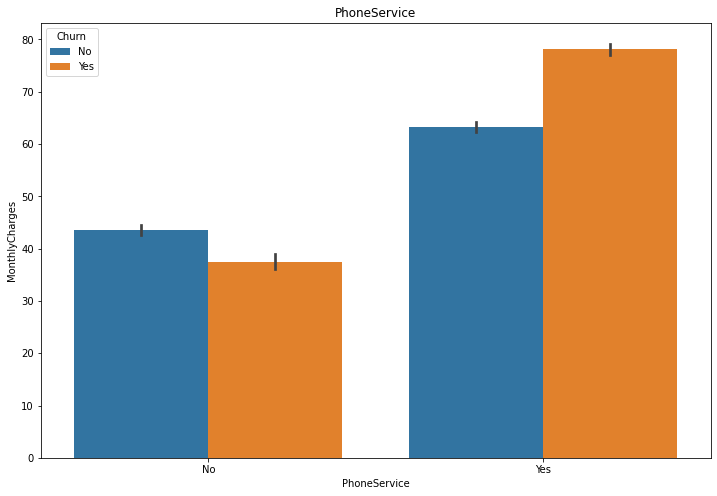

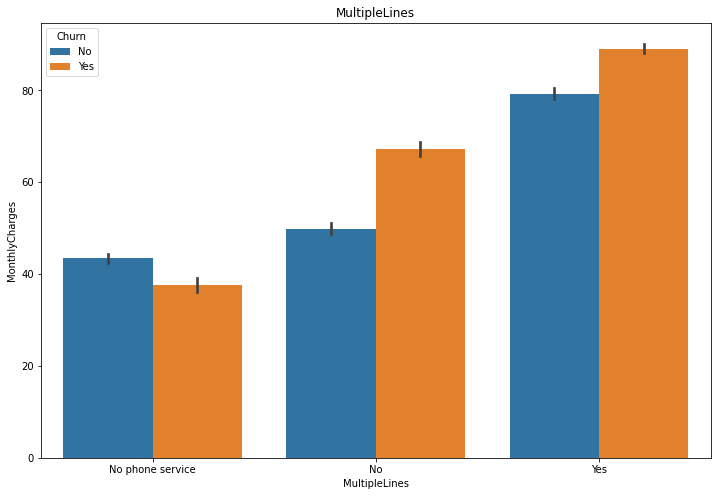

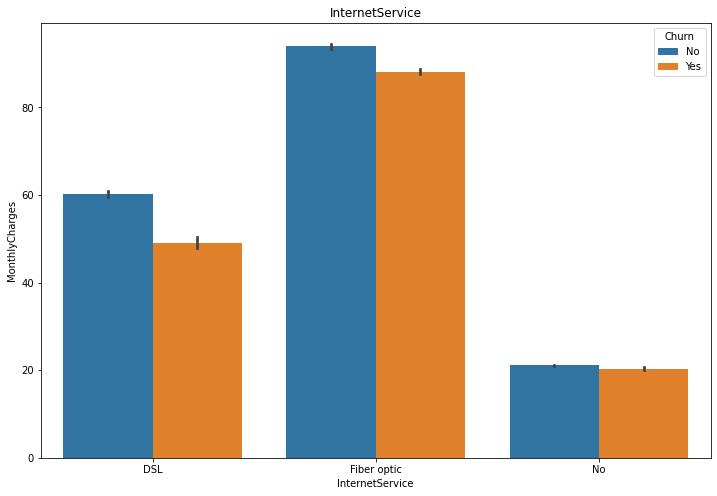

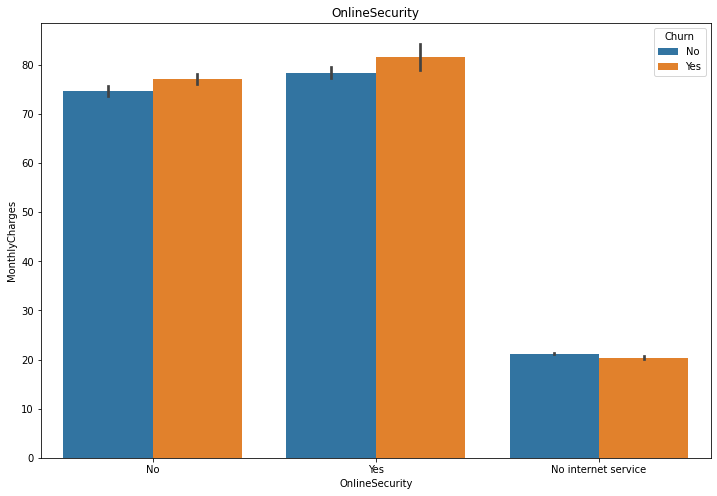

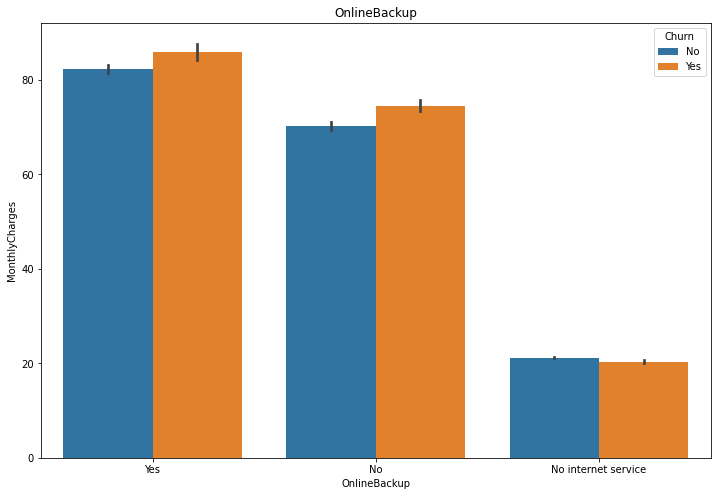

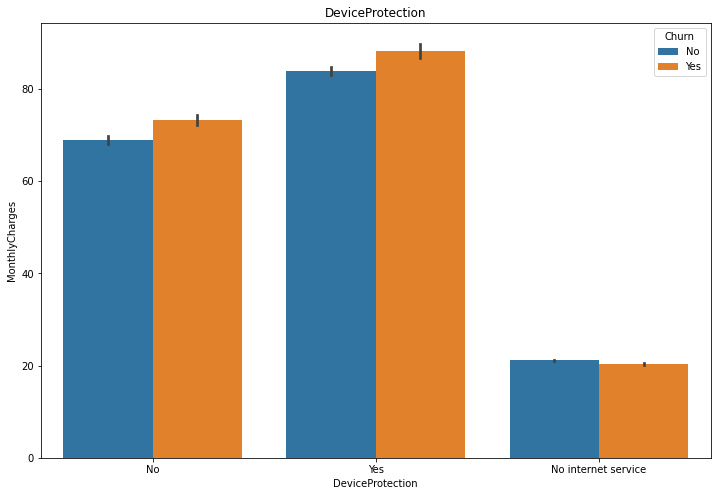

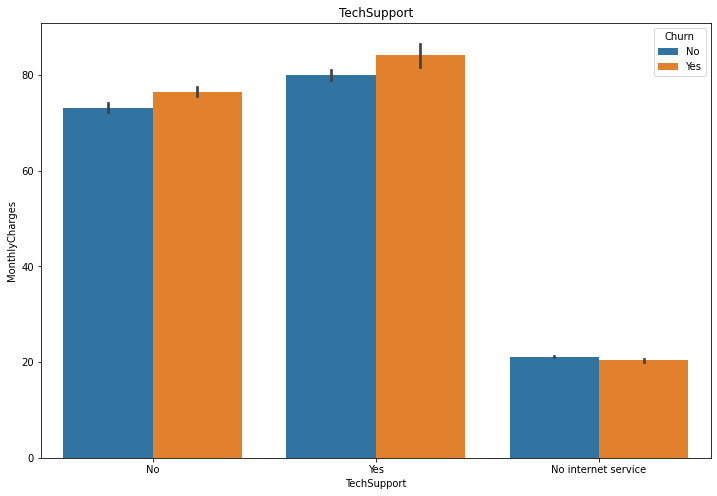

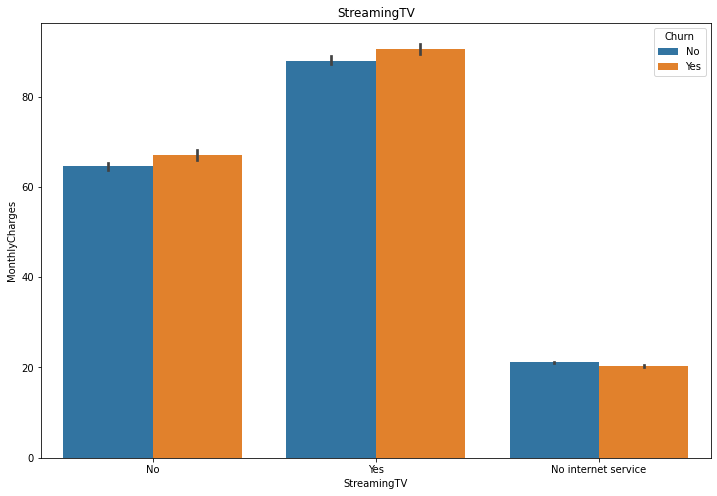

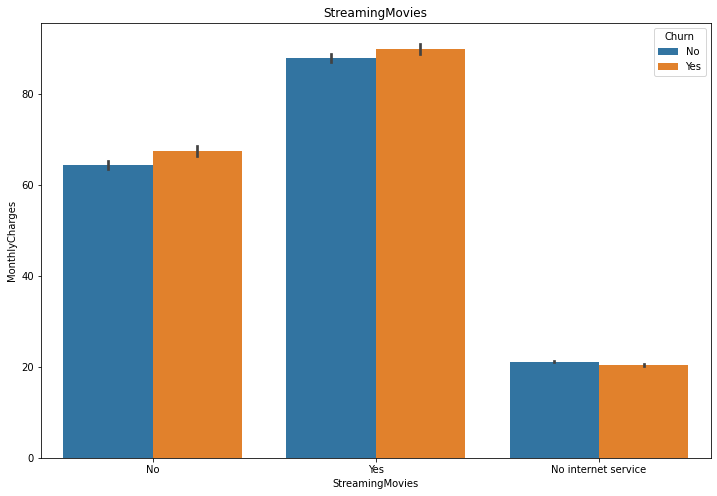

In [25]:
%matplotlib inline
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


for service in services:
    plt.figure(figsize = (12, 8))
    sns.barplot(x = service, y = 'MonthlyCharges', data = df, hue = 'Churn')
    plt.title(service)
    plt.show()

All services seem to be contibuting to a high monthly charge hence the customers churning apart from those connected to a fibre optic and DSL internet service.

In [26]:
phone_service = df[df['PhoneService'] == 'Yes']

<AxesSubplot:xlabel='Contract', ylabel='count'>

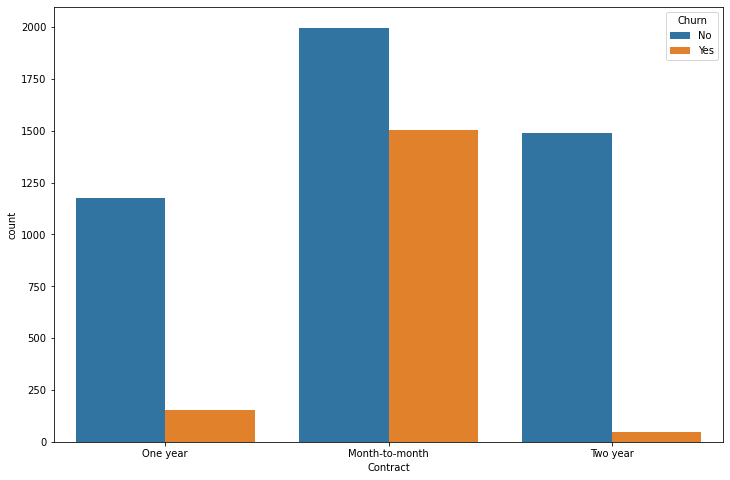

In [27]:
plt.figure(figsize = (12, 8))
sns.countplot(data = phone_service, x = 'Contract', hue = 'Churn')

Advocating for a Two year contract for providiton of phone service only would be the best because its less prone to having clientele leaving the brand even though it is not the most popular option.

## Payment: (Use visualization in explaining your analysis)

    a.	If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
    
        i.	Basic
        
        ii.	Plus
      
        iii. Premium

<Figure size 864x576 with 0 Axes>

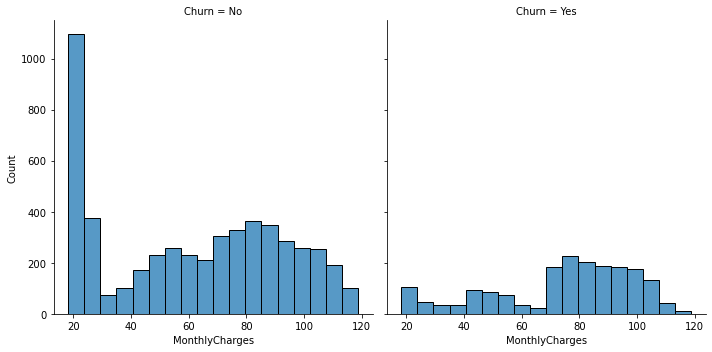

In [28]:
plt.figure(figsize = (12, 8))
sns.displot(data = df, x = 'MonthlyCharges', col = 'Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

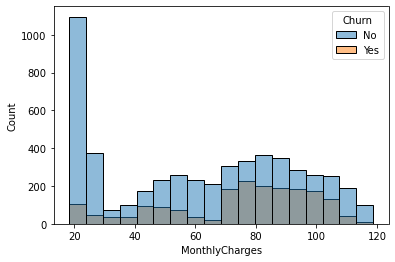

In [29]:
sns.histplot(data = df, x = 'MonthlyCharges', hue = 'Churn')

Most customers at the are more willing to pay USD 20, 60 and 80. Therefore, the ideal bouque distribution would be:

        i.	Basic - $20
        
        ii.	Plus - $60
      
        iii. Premium - $80


<AxesSubplot:>

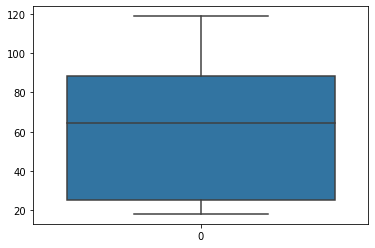

In [32]:
sns.boxplot(data=churn_no['MonthlyCharges'])

In [33]:
churn_no['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

Alternatively, we could use the quatile distribution of the values to identify the package prices for the three boquets as below:

        i.	Basic - $25
        
        ii.	Plus - $64
      
        iii. Premium - $88

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

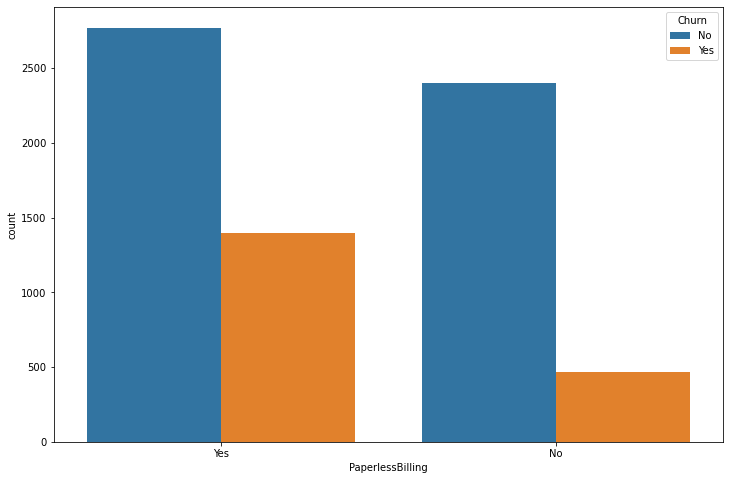

In [34]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn')

Majority of customers seem to be sticking with the telco brand and using paperless payment. Howerver, a lager potion of the customers who are shifting to another telco brand also use paperless and opposed to those who do not. Therefore, it is wise for the company not to go fully paperless with the aim of reducing their customers churning.